In [1]:
print("Nouhaila lfenna")

Nouhaila lfenna


In [2]:
import pandas as pd
import numpy as np

# read in all our data
nfl_data = pd.read_csv("C:\\Users\\Clone\\PycharmProjects\\House_Pricing\\data\\raw\\house_prices_synthetic.csv")

In [3]:
nfl_data.head()

,Surface_m2,Nb_Chambres,Nb_Salles_de_Bain,Quartier,Age_Maison,Prix
0,142,5,3,Campagne,25,536055
1,132,3,2,Centre,36,500890
2,54,4,1,Centre,25,303540
3,146,3,3,Centre,22,601051
4,111,3,3,Centre,8,481240


In [4]:
print("Shape:", nfl_data.shape)

Shape: (100, 6)


In [5]:
print(nfl_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Surface_m2         100 non-null    int64 
 1   Nb_Chambres        100 non-null    int64 
 2   Nb_Salles_de_Bain  100 non-null    int64 
 3   Quartier           100 non-null    object
 4   Age_Maison         100 non-null    int64 
 5   Prix               100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB
None


In [6]:
print(nfl_data.describe())

       Surface_m2  Nb_Chambres  Nb_Salles_de_Bain  Age_Maison           Prix
count  100.000000   100.000000         100.000000  100.000000     100.000000
mean   113.140000     2.920000           1.990000   23.900000  433887.980000
std     44.949359     1.433228           0.834787   14.357274  143594.154884
min     41.000000     1.000000           1.000000    0.000000  137587.000000
25%     78.500000     1.750000           1.000000   11.000000  323166.000000
50%    111.000000     3.000000           2.000000   25.000000  444686.000000
75%    147.750000     4.000000           3.000000   34.250000  540801.000000
max    197.000000     5.000000           3.000000   49.000000  769321.000000


In [7]:
# Vérifier s'il y a des valeurs manquantes
print("Valeurs manquantes par colonne :")
print(nfl_data.isnull().sum())

Valeurs manquantes par colonne :
Surface_m2           0
Nb_Chambres          0
Nb_Salles_de_Bain    0
Quartier             0
Age_Maison           0
Prix                 0
dtype: int64


In [9]:
# Séparer les variables explicatives (X) et la variable cible (y)
X = nfl_data.drop(columns=['Prix'])  # les colonnes utilisées pour prédire
y = nfl_data['Prix']                 # la colonne à prédire

print("Forme de X :", X.shape)
print("Forme de y :", y.shape)


Forme de X : (100, 5)
Forme de y : (100,)


In [10]:
from sklearn.model_selection import train_test_split

# Découpage : 80% pour l'entraînement, 20% pour le test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Taille du train :", X_train.shape)
print("Taille du test :", X_test.shape)

Taille du train : (80, 5)
Taille du test : (20, 5)


In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Colonnes numériques et catégorielles
numeric_features = ['Surface_m2', 'Nb_Chambres', 'Nb_Salles_de_Bain', 'Age_Maison']
categorical_features = ['Quartier']

# Étapes pour les variables numériques
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # remplace les valeurs manquantes
    ('scaler', StandardScaler())                    # met toutes les valeurs sur la même échelle
])

# Étapes pour les variables catégorielles
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # remplace les valeurs manquantes par la plus fréquente
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     # transforme le texte en nombres
])

# Combine les deux transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Créer un pipeline complet : préprocessing + modèle
model_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Entraîner le modèle sur les données d'entraînement
model_lr.fit(X_train, y_train)

print("✅ Modèle de régression linéaire entraîné avec succès !")


✅ Modèle de régression linéaire entraîné avec succès !


In [14]:
# Prédire les prix sur le jeu de test
y_pred_lr = model_lr.predict(X_test)

# Afficher quelques exemples
comparison = pd.DataFrame({'Prix_Réel': y_test.values[:10], 'Prix_Prédit': y_pred_lr[:10].astype(int)})
comparison


,Prix_Réel,Prix_Prédit
0,407249,410051
1,332408,330229
2,540861,554864
3,348950,333167
4,467182,466709
5,631576,629606
6,269715,274447
7,538652,518897
8,551746,601958
9,536055,560425


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calcul des métriques
mae = mean_absolute_error(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2 = r2_score(y_test, y_pred_lr)

print(f"Erreur absolue moyenne (MAE): {mae:.2f}")
print(f"Racine de l'erreur quadratique moyenne (RMSE): {rmse:.2f}")
print(f"Coefficient de détermination (R²): {r2:.2f}")


Erreur absolue moyenne (MAE): 16116.67
Racine de l'erreur quadratique moyenne (RMSE): 21392.97
Coefficient de détermination (R²): 0.97


In [17]:
import pandas as pd

# Créer un DataFrame pour analyser les erreurs
errors = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_pred_lr
})
errors['residuals'] = errors['y_test'] - errors['y_pred']  # erreur brute
errors['abs_residuals'] = errors['residuals'].abs()         # erreur absolue


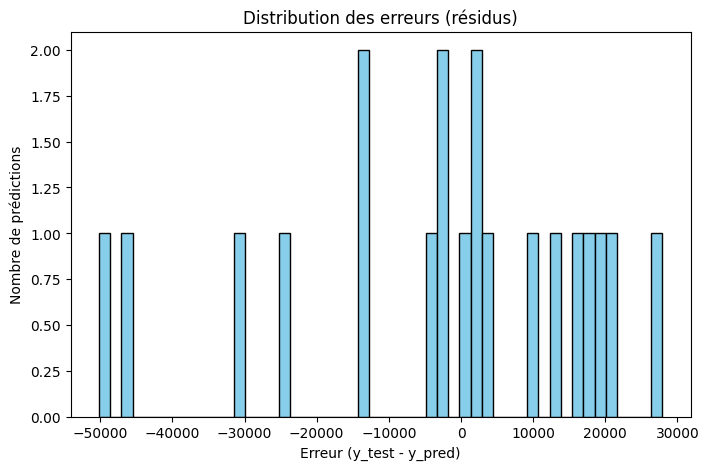

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(errors['residuals'], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution des erreurs (résidus)")
plt.xlabel("Erreur (y_test - y_pred)")
plt.ylabel("Nombre de prédictions")
plt.show()


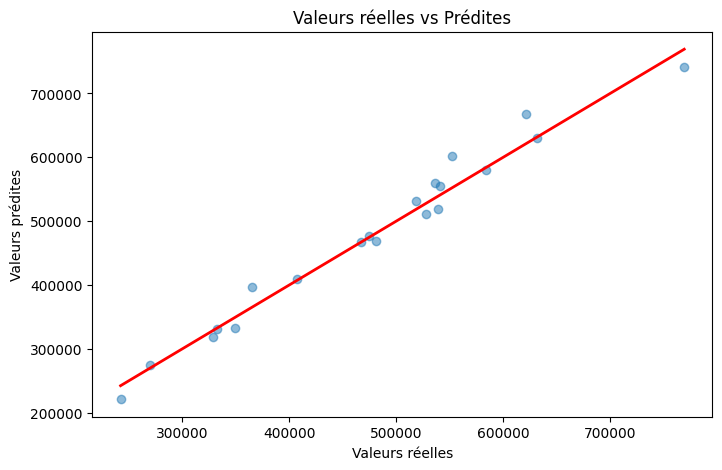

In [19]:
plt.figure(figsize=(8,5))
plt.scatter(errors['y_test'], errors['y_pred'], alpha=0.5)
plt.plot([errors['y_test'].min(), errors['y_test'].max()],
         [errors['y_test'].min(), errors['y_test'].max()],
         color='red', linewidth=2)  # ligne y_test = y_pred
plt.title("Valeurs réelles vs Prédites")
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.show()


In [20]:
# Top 10 des plus grosses erreurs absolues
top_errors = errors.sort_values(by='abs_residuals', ascending=False).head(10)
print(top_errors)


    y_test         y_pred     residuals  abs_residuals
10  551746  601958.674146 -50212.674146   50212.674146
76  620943  667703.510894 -46760.510894   46760.510894
31  365066  396391.526183 -31325.526183   31325.526183
73  769321  741414.931249  27906.068751   27906.068751
0   536055  560425.714787 -24370.714787   24370.714787
77  242180  220981.781558  21198.218442   21198.218442
80  538652  518897.660629  19754.339371   19754.339371
30  528098  510675.324853  17422.675147   17422.675147
45  348950  333167.966729  15782.033271   15782.033271
70  540861  554864.604449 -14003.604449   14003.604449
